<a href="https://colab.research.google.com/github/aqil0300/EDA-Projects/blob/main/Unemployement_in_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [130]:
df=pd.read_csv('/content/unemployment.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [132]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [134]:
df.shape

(768, 7)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [136]:
df.isna().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [137]:
df.dtypes

,0
Region,object
Date,object
Frequency,object
Estimated Unemployment Rate (%),float64
Estimated Employed,float64
Estimated Labour Participation Rate (%),float64
Area,object


In [138]:
df2 = df.dropna(how='all')
df2['Region'].fillna(df2['Region'].mode()[0],inplace=True)
df2[' Date'].fillna(method='ffill', inplace=True)
df2[' Frequency'].fillna(df2[' Frequency'].mode()[0],inplace=True)
df2[' Estimated Unemployment Rate (%)'].fillna(df2[' Estimated Unemployment Rate (%)'].mean(),inplace=True)
df2[' Estimated Employed'].fillna(df2[' Estimated Employed'].mean(),inplace=True)
df2[' Estimated Labour Participation Rate (%)'].fillna(df2[' Estimated Labour Participation Rate (%)'].mean(),inplace=True)
df2['Area'].fillna(df2['Area'].mode()[0],inplace=True)

<ipython-input-138-398c5dd74b3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Region'].fillna(df2['Region'].mode()[0],inplace=True)
<ipython-input-138-398c5dd74b3b>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2[' Date'].fillna(method='ffill', inplace=True)
<ipython-input-138-398c5dd74b3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[' Date'].fillna(method='ffill', inplace=True)
<ipython-input-138-398c5dd74b3b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

In [139]:
df2 = df2.drop_duplicates()

In [140]:
df2.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [141]:
df2.duplicated().sum()

0

In [142]:
df2

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [143]:
print(df2.describe())

        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max                    

In [144]:
#We shall rename thecolums for easier access
df2=df2.rename(columns={' Date': 'Date',' Frequency':'Frequency',' Estimated Unemployment Rate (%)': 'Est_Unemp_Rate',' Estimated Employed':'Est_Emp_Rate',
                      ' Estimated Labour Participation Rate (%)':'Est_Labour_Rate'}).reset_index(drop=True)

In [145]:
 round(df.isnull().sum()/df2.shape[0]*100,2)

,0
Region,3.78
Date,3.78
Frequency,3.78
Estimated Unemployment Rate (%),3.78
Estimated Employed,3.78
Estimated Labour Participation Rate (%),3.78
Area,3.78


In [146]:
#Deleting the null rows
df2.dropna(inplace=True)

df2.shape

(740, 7)

In [147]:
df2.isnull().sum()/df.shape[0]

,0
Region,0.0
Date,0.0
Frequency,0.0
Est_Unemp_Rate,0.0
Est_Emp_Rate,0.0
Est_Labour_Rate,0.0
Area,0.0


In [148]:
#change the dtpe of 'Date' column

df2['Date']=pd.to_datetime(df2['Date'])

df2.dtypes

<ipython-input-148-0d1c1c4bea23>:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date']=pd.to_datetime(df2['Date'])


,0
Region,object
Date,datetime64[ns]
Frequency,object
Est_Unemp_Rate,float64
Est_Emp_Rate,float64
Est_Labour_Rate,float64
Area,object


In [149]:
df2['Region'].value_counts()

,count
Region,
Andhra Pradesh,28
Kerala,28
West Bengal,28
Uttar Pradesh,28
Tripura,28
Telangana,28
Tamil Nadu,28
Rajasthan,28
Punjab,28


In [150]:
df2['Date'].value_counts()

,count
Date,
2019-10-31,55
2019-11-30,55
2019-05-31,54
2019-06-30,54
2019-07-31,54
2019-08-31,53
2019-12-31,53
2020-01-31,53
2020-02-29,53


In [151]:
df2['Frequency'].value_counts()

,count
Frequency,
Monthly,381
Monthly,359


In [152]:
df2=df2.drop(['Frequency'],axis=1)
df2.head()

,Region,Date,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Area
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural


In [153]:
df2['Est_Unemp_Rate'].value_counts()

,count
Est_Unemp_Rate,
0.00,11
3.31,4
12.50,3
5.45,3
6.67,3
...,...
13.70,1
4.03,1
40.59,1


In [154]:
df2['Est_Emp_Rate'].value_counts()

,count
Est_Emp_Rate,
11999139.0,1
1183770.0,1
241366.0,1
246596.0,1
227804.0,1
...,...
6021921.0,1
6395022.0,1
6164215.0,1


In [155]:
df2['Est_Labour_Rate'].value_counts()

,count
Est_Labour_Rate,
40.43,3
42.82,3
39.92,3
43.25,3
39.04,3
...,...
44.08,1
46.50,1
45.79,1


In [156]:
df2['Area'].value_counts()

,count
Area,
Urban,381
Rural,359


In [157]:
#We shall create a new column for year and month to analyse the between 2019 and 2020

df2['Year'] = df2['Date'].dt.year
df2['Month']=df2['Date'].dt.month

df2

,Region,Date,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Area,Year,Month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,2019,9
...,...,...,...,...,...,...,...,...
735,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban,2020,2
736,West Bengal,2020-03-31,6.67,10806105.0,43.34,Urban,2020,3
737,West Bengal,2020-04-30,15.63,9299466.0,41.20,Urban,2020,4
738,West Bengal,2020-05-31,15.22,9240903.0,40.67,Urban,2020,5


In [158]:
#Analysing the Area column

df2.Area.value_counts(normalize=True)*100

,proportion
Area,
Urban,51.486486
Rural,48.513514


<ipython-input-159-3491a9b6a1be>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df2,x='Area',palette=['Teal','Maroon'])


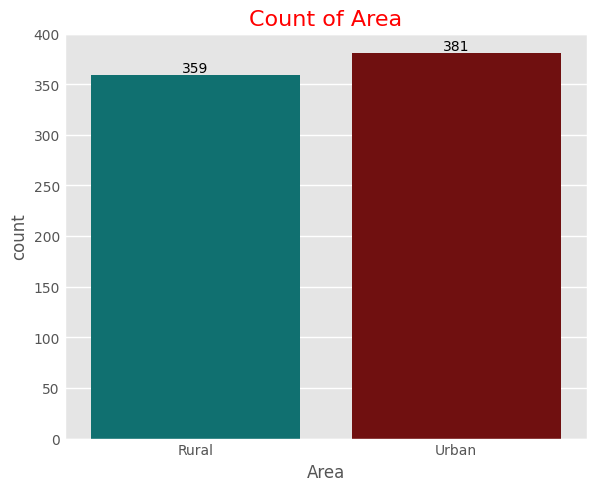

In [159]:
plt.figure(figsize=[6,5])
ax=sns.countplot(data=df2,x='Area',palette=['Teal','Maroon'])

plt.title('Count of Area',fontdict={'fontsize':16,'fontweight':12,'color':'Red'})
for x in ax.containers:
  ax.bar_label(x,rotation=0)

plt.show()

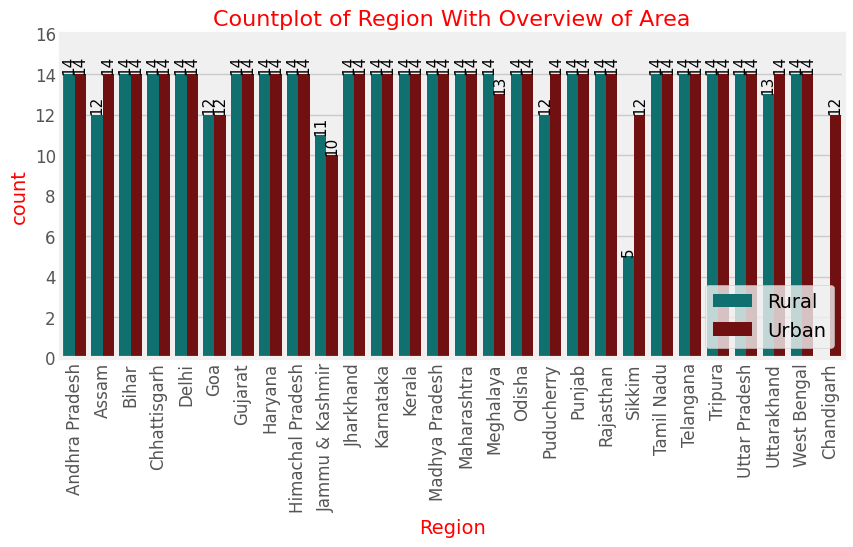

In [160]:
plt.figure(figsize=(9,4))
plt.style.use('fivethirtyeight')
ax=sns.countplot(x=df['Region'],hue=df['Area'],palette=['Teal','Maroon'])
plt.legend(loc='lower right')

for x in ax.containers:
  ax.bar_label(x,rotation=90,fontsize=11)

plt.xlabel('Region',color='red',fontsize=14)
plt.ylabel('count',color='red',fontsize=14)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,16)
plt.title('Countplot of Region With Overview of Area',color='Red',fontsize=16)
plt.show()

<ipython-input-161-84cc2d2e26d4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df2['Est_Unemp_Rate'],x=df2['Year'],palette=['Teal','Maroon'])


<function matplotlib.pyplot.show(close=None, block=None)>

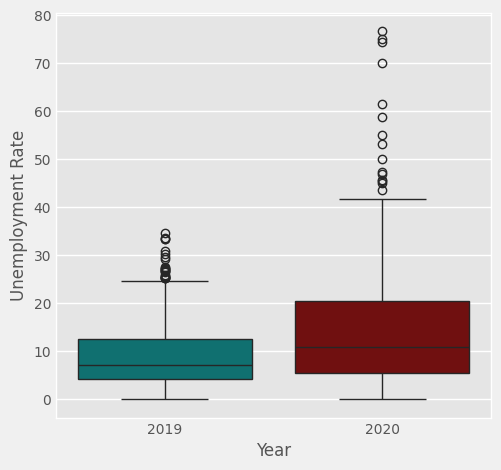

In [161]:
#Analysing the Unemployment Rate column
plt.figure(figsize=(5,5))
plt.style.use('ggplot')
sns.boxplot(y=df2['Est_Unemp_Rate'],x=df2['Year'],palette=['Teal','Maroon'])
plt.ylabel('Unemployment Rate')
plt.show

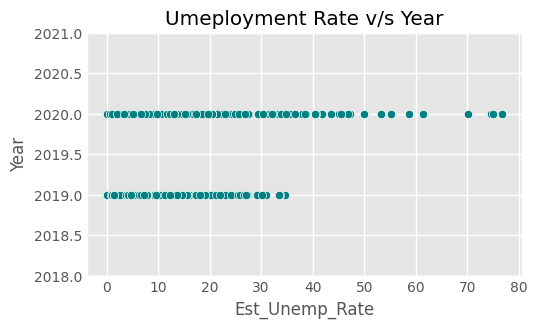

In [162]:
plt.figure(figsize=(5,3))
plt.style.use('ggplot')
sns.scatterplot(x=df2['Est_Unemp_Rate'],y=df2['Year'], color='teal')
plt.ylim(2018,2021)
plt.title('Umeployment Rate v/s Year')
plt.show()

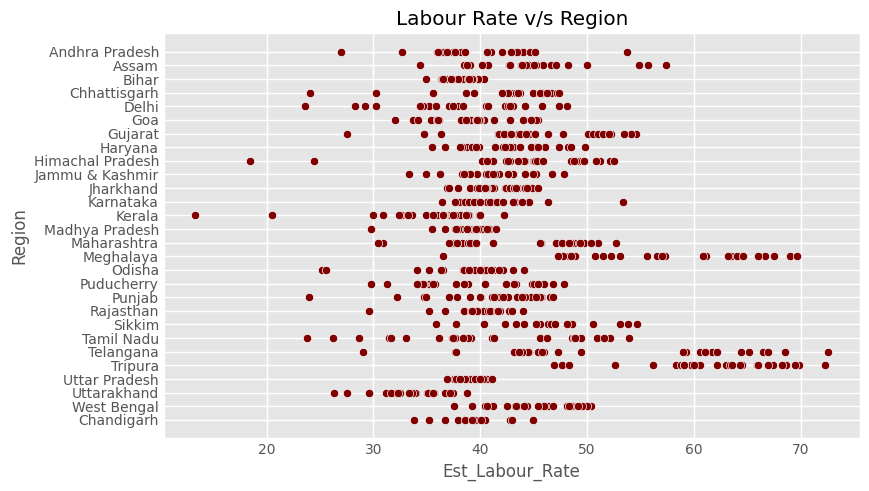

In [163]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x=df2['Est_Labour_Rate'],y=df2['Region'],color='Maroon')
plt.title('Labour Rate v/s Region')
plt.show()

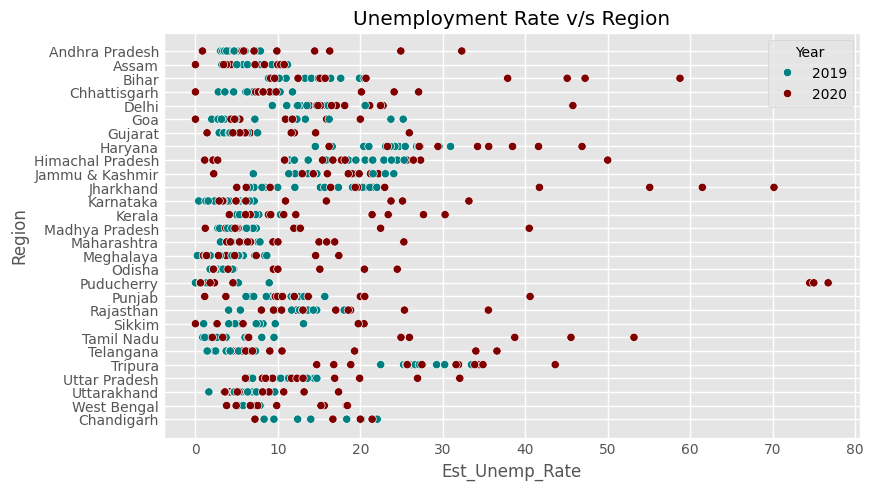

In [164]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x=df2['Est_Unemp_Rate'],y=df2['Region'],hue=df2['Year'],palette=['Teal','Maroon'])
plt.title('Unemployment Rate v/s Region')
plt.show()

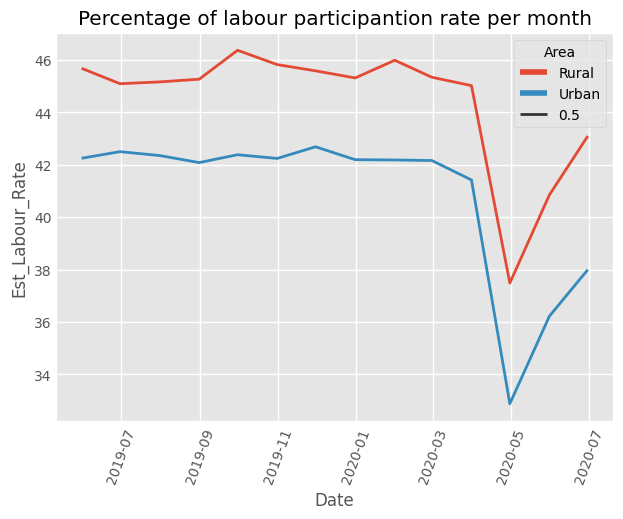

In [165]:
sns.lineplot(data=df2,x='Date',y='Est_Labour_Rate',hue='Area',errorbar=None,size=0.5)
plt.title('Percentage of labour participantion rate per month')
plt.xticks(rotation=70)
plt.show()